In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [16]:
lat_lngs

In [7]:
cities

['illoqqortoormiut',
 'kondinskoye',
 'kapaa',
 'katobu',
 'avera',
 'takoradi',
 'saint-pierre',
 'mataura',
 'saint-leu',
 'puerto ayora',
 'hasaki',
 'san cristobal',
 'bluff',
 'souillac',
 'yatou',
 'lansdale',
 'busselton',
 'punta arenas',
 'cabo san lucas',
 'nishihara',
 'kruisfontein',
 'aswan',
 'tasiilaq',
 'oskemen',
 'ushuaia',
 'bredasdorp',
 'thompson',
 'taltal',
 'mys shmidta',
 'barrow',
 'grand river south east',
 'hobart',
 'east london',
 'carnarvon',
 'albany',
 'port alfred',
 'novovarshavka',
 'avarua',
 'tumannyy',
 'qaanaaq',
 'hilo',
 'singleton',
 'gushikawa',
 'rikitea',
 'kuytun',
 'xai-xai',
 'grinnell',
 'matay',
 'longyearbyen',
 'samusu',
 'hermanus',
 'partizanskoye',
 'laguna',
 'kailua',
 'talovaya',
 'flinders',
 'cape town',
 'pangnirtung',
 'altay',
 'terenos',
 'belushya guba',
 'arraial do cabo',
 'hongjiang',
 'katsuura',
 'yulara',
 'aklavik',
 'torbay',
 'oriximina',
 'balakliya',
 'hualmay',
 'barentsburg',
 'fortuna',
 'khatanga',
 'cap m

In [19]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lisst to hold information
temperatures = []
longitudes = []
latitudes = []
clouds = []
wind_speeds = []
countries = []
humidities = []
dates = []
cities_found = []

print("Beginning Data Retrieval")
print("-----------------------------")
cont=1

for city in cities:
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    
    # Get weather data
    weather_response = requests.get(query_url)
    
    if weather_response.status_code == 200:
        print(f"Processing Record {cont} | {city}")
        weather_json = weather_response.json()
        
        # Get temperature from JSON response
        cities_found.append(city)
        temperature = weather_json["main"]["temp_max"]
        temperatures.append(temperature)
        longitude = weather_json["coord"]["lon"]
        longitudes.append(longitude)
        latitude = weather_json["coord"]["lat"]
        latitudes.append(latitude)
        cloud = weather_json["clouds"]["all"]
        clouds.append(cloud)
        wind_speed = weather_json["wind"]["speed"]
        wind_speeds.append(wind_speed)
        country = weather_json["sys"]["country"]
        countries.append(country)
        humidity = weather_json["main"]["humidity"]
        humidities.append(humidity)
        date = weather_json["dt"]
        dates.append(date)
        
        cont=cont+1
    elif weather_response.status_code == 404:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 | kondinskoye
Processing Record 2 | kapaa
Processing Record 3 | katobu
Processing Record 4 | avera
Processing Record 5 | takoradi
Processing Record 6 | saint-pierre
Processing Record 7 | mataura
Processing Record 8 | saint-leu
Processing Record 9 | puerto ayora
Processing Record 10 | hasaki
Processing Record 11 | san cristobal
Processing Record 12 | bluff
Processing Record 13 | souillac
Processing Record 14 | yatou
Processing Record 15 | lansdale
Processing Record 16 | busselton
Processing Record 17 | punta arenas
Processing Record 18 | cabo san lucas
Processing Record 19 | nishihara
Processing Record 20 | kruisfontein
Processing Record 21 | aswan
Processing Record 22 | tasiilaq
Processing Record 23 | oskemen
Processing Record 24 | ushuaia
Processing Record 25 | bredasdorp
Processing Record 26 | thompson
Processing Record 27 | taltal
City not found. Skipping...
Processing Record 28 | 

Processing Record 223 | hambantota
Processing Record 224 | poya
Processing Record 225 | bol
Processing Record 226 | cururupu
Processing Record 227 | marzuq
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 228 | voskevan
Processing Record 229 | lamar
City not found. Skipping...
Processing Record 230 | belyy yar
Processing Record 231 | san patricio
Processing Record 232 | paamiut
Processing Record 233 | henties bay
Processing Record 234 | shelburne
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 235 | chuy
Processing Record 236 | makokou
Processing Record 237 | evora
Processing Record 238 | atasu
Processing Record 239 | dikson
Processing Record 240 | cadillac
Processing Record 241 | vamvakofiton
Processing Record 242 | caravelas
Processing Record 243 | port hedland
Processing Record 244 | flin flon
Processing Record 245 | teya
Processing Record 246 | raudeberg
Processing Record 247 

Processing Record 446 | sambava
Processing Record 447 | costache negri
Processing Record 448 | chapais
City not found. Skipping...
Processing Record 449 | miri
Processing Record 450 | sibolga
Processing Record 451 | santa cruz
Processing Record 452 | burma
Processing Record 453 | udachnyy
Processing Record 454 | kautokeino
Processing Record 455 | bubaque
Processing Record 456 | bukachacha
Processing Record 457 | klyuchi
Processing Record 458 | tiznit
Processing Record 459 | pozo colorado
Processing Record 460 | palmer
Processing Record 461 | victoria
Processing Record 462 | micheweni
Processing Record 463 | puerto escondido
Processing Record 464 | roald
Processing Record 465 | poum
Processing Record 466 | mandalgovi
Processing Record 467 | lata
Processing Record 468 | mitchell
Processing Record 469 | champerico
Processing Record 470 | port macquarie
Processing Record 471 | svetlogorsk
Processing Record 472 | kahului
Processing Record 473 | sechura
Processing Record 474 | altus
Processi

In [23]:
list_of_tuples = list(zip(cities_found,clouds,countries,dates,humidities,latitudes,longitudes,temperatures,wind_speeds))
df_cities = pd.DataFrame(list_of_tuples, columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
df_cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kondinskoye,4,RU,1563597418,50,59.65,67.41,81.95,8.97
1,kapaa,20,US,1563597437,74,22.08,-159.32,86.00,14.99
2,katobu,17,ID,1563597438,59,-4.94,122.53,85.73,6.98
3,avera,1,US,1563597438,100,33.19,-82.53,80.60,4.36
4,takoradi,100,GH,1563597438,92,4.89,-1.75,74.03,3.62


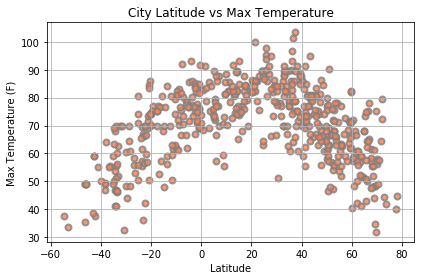

In [24]:
lat_temp =  plt.scatter(df_cities["Lat"], df_cities["Max Temp"], c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Max Temp')
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#text="Note:" + '\n' + "Circule size correlates with driver count per city"
#plt.gcf().text(1, 0.5, text, fontsize=10)
plt.tight_layout()
plt.savefig("latitude_vs_temperature.png",bbox_inches="tight")
plt.show()

In [ ]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Bujumbura"
units = "metric"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get temperature from JSON response
temperature = weather_json["main"]["temp"]